In [33]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak

In [108]:
file = uproot.open("../build/G4FastSim.root")
gp = file["diff_xsec"]
ev = file["ev"].arrays()

In [36]:
cost=gp["cost"].array()
ff=gp["ff"].array()
mat=gp["mat"].array()
kn=gp["kn"].array()
z=gp["Z"].array()

# print unique values from mat array
print(np.unique(mat))


['Ar', 'C', 'Cr', 'F', 'Fe', 'H', 'N', 'Ni', 'O', 'Xe']


In [52]:
def plot_klein_nishina(material):
    cut = (mat == material) 
    plt.plot(cost[cut],kn[cut]*z[cut], linestyle='-', color="black")
    plt.plot(cost[cut],kn[cut]*ff[cut], linestyle='--', color="blue")

    plt.xlabel("cos($\\theta$)")
    plt.ylabel("d$\sigma$/d$\Omega$ (a.u.)")

def plot_form(material):
    cut = (mat == material) 
    plt.plot(cost[cut],ff[cut], color="black")

    plt.xlabel("cos($\theta$)")
    plt.ylabel("Form factor (a.u.)")

def plot_hist():
    h = file['cost']
    bin_contents = h.values()/47
    bin_edges = h.axis().edges()
    plt.hist(bin_edges[:-1], bins=bin_edges, weights=bin_contents, histtype='step', edgecolor='red')	
    plt.xlabel('$\\cos(\\theta)$')
    plt.ylabel('$dN / d\\cos(\\theta)$')
    plt.title('Compton scatter angles for Xe')
    plt.grid(False)



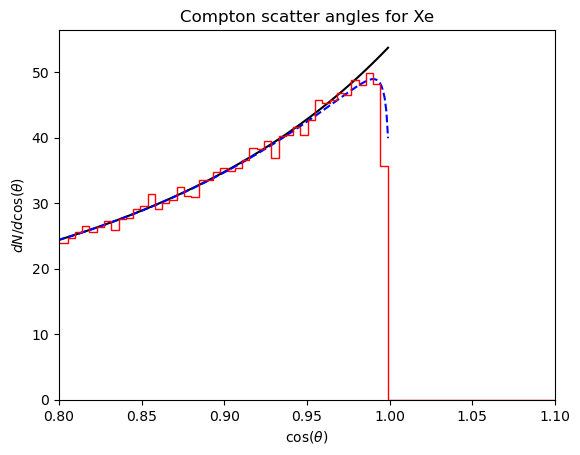

In [54]:
plot_klein_nishina("Xe")
plot_hist()

plt.xlim(0.8,1.1)
plt.show()

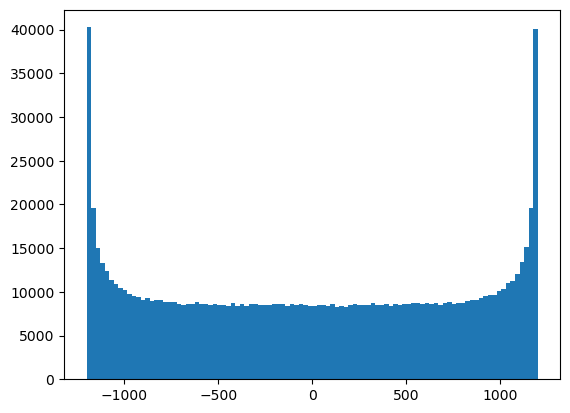

In [109]:
h = plt.hist(ev['xp'],bins=100)


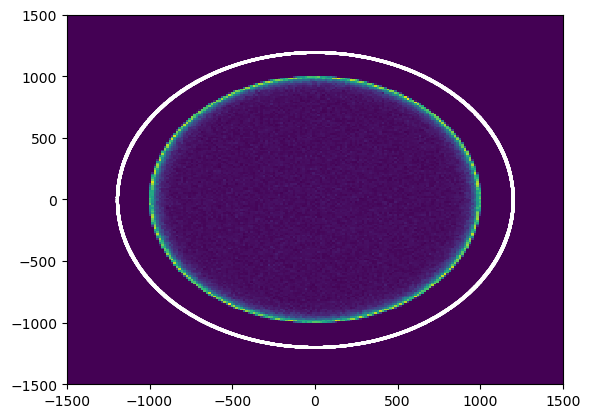

In [121]:
# I want to plot xh which is a jagged array. sometimes it has 0 elements, sometimes 1, sometimes 2, etc.
# I want to plot all elements

# please help me to plot xh

xh =ak.to_numpy(ak.flatten(ev['xh']))
yh =ak.to_numpy(ak.flatten(ev['yh']))


# I now want a 2D histogram of xh vs yh
h =plt.hist2d(xh,yh,bins=200,range=((-1500,1500),(-1500,1500)))


# Apply the cut to the data
zcut = (abs(ev['zp']) < 100.0)

# Convert 'xp' and 'yp' branches to arrays and apply the boolean mask
xp = ak.to_numpy(ev['xp'][zcut])
yp = ak.to_numpy(ev['yp'][zcut])

# Create scatter plot.
plt.scatter(xp, yp, marker='.', color='white', s=1)

#plt.plot(ev['xp'].array(),ev['yp'].array())


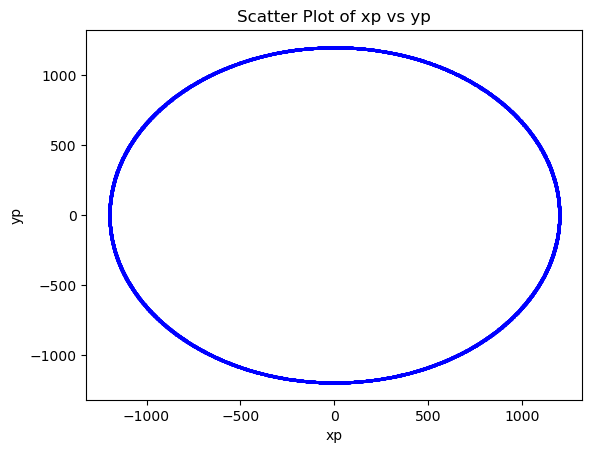

In [118]:
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

# Apply the cut to the data
zcut = (abs(ev['zp']) < 100.0)

# Convert 'xp' and 'yp' branches to arrays and apply the boolean mask
xp = ak.to_numpy(ev['xp'][zcut])
yp = ak.to_numpy(ev['yp'][zcut])

# Flatten the arrays
#xp = ak.flatten(xp)
#yp = ak.flatten(yp)

# Create scatter plot.
# set marker size to 1 to make the points smaller
plt.scatter(xp, yp, marker='.', color='blue', s=1)

